<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99106522
            <br />
            Name = Shabnam   
            <br />
            Last_Name = Fazliani 
        </div>
        <div class="column">
        <br />
            student_number = 99106493
            <br />
            Name = Mohammad   
            <br />
            Last_Name = Ghafourian 
        </div>
    </font>
    </div>


1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [1]:
# Import Necessary Libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torchvision.transforms as transforms

# Load Dataset and Prepare It

In [2]:
# Load Dataset and Prepare It
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 64

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define Your Model
torch neural network model

In [3]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(True),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 784),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Fit The Model
Also Define optimizer, Criterion and other parameters 

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def add_gaussian_noise(images, std_dev):
    noisy_images = images + torch.randn_like(images) * std_dev
    return torch.clamp(noisy_images, min=-1.0, max=1.0)

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_images, _ in train_loader:
        batch_images = batch_images.view(batch_images.size(0), -1).to(device)
        noisy_batch_images = add_gaussian_noise(batch_images, std_dev=0.3).to(device)

        optimizer.zero_grad()
        outputs = model(noisy_batch_images)
        loss = criterion(outputs, batch_images)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * batch_images.size(0)

    train_loss /= len(train_loader.dataset)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}")

Epoch [1/20], Loss: 0.1386
Epoch [2/20], Loss: 0.0688
Epoch [3/20], Loss: 0.0545
Epoch [4/20], Loss: 0.0479
Epoch [5/20], Loss: 0.0436
Epoch [6/20], Loss: 0.0406
Epoch [7/20], Loss: 0.0385
Epoch [8/20], Loss: 0.0367
Epoch [9/20], Loss: 0.0352
Epoch [10/20], Loss: 0.0339
Epoch [11/20], Loss: 0.0329
Epoch [12/20], Loss: 0.0319
Epoch [13/20], Loss: 0.0311
Epoch [14/20], Loss: 0.0304
Epoch [15/20], Loss: 0.0298
Epoch [16/20], Loss: 0.0292
Epoch [17/20], Loss: 0.0285
Epoch [18/20], Loss: 0.0280
Epoch [19/20], Loss: 0.0276
Epoch [20/20], Loss: 0.0271


# Plot The Results

Test Loss: 0.0273


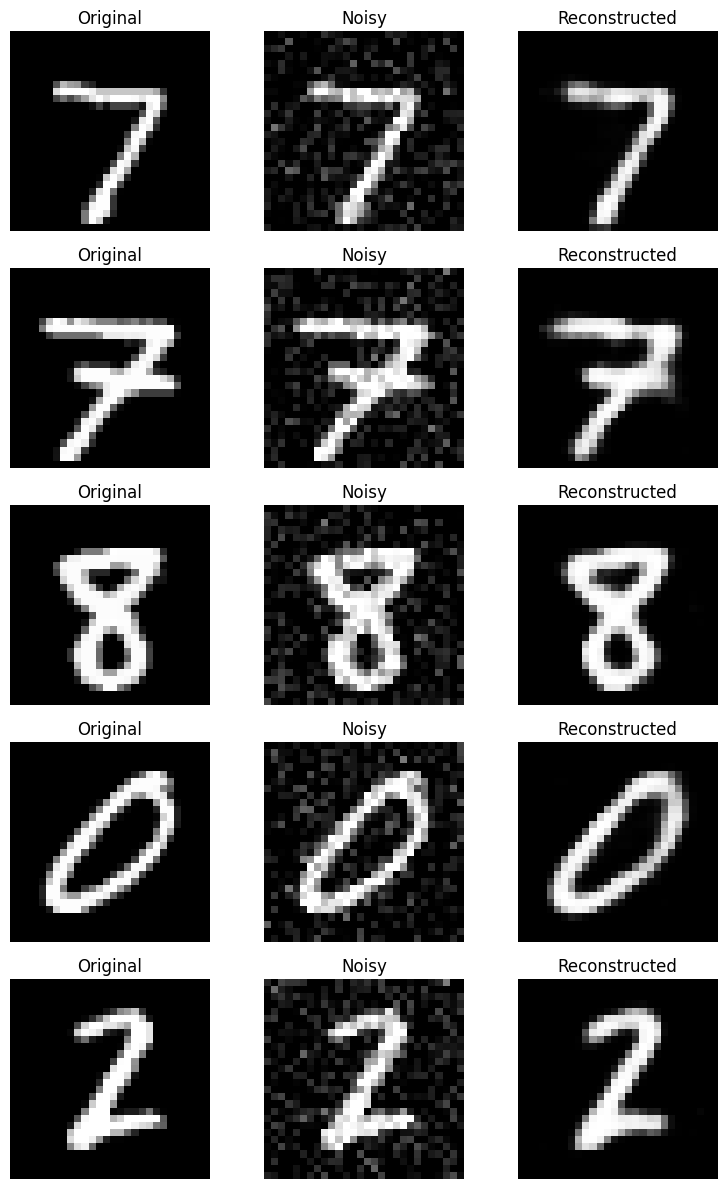

In [5]:
model.eval()
test_loss = 0.0
num_samples = 5

original_images = []
noisy_images = []
reconstructed_images = []

with torch.no_grad():
    for i, (batch_images, _) in enumerate(test_loader):
        batch_images = batch_images.view(batch_images.size(0), -1).to(device)
        noisy_batch_images = add_gaussian_noise(batch_images, std_dev=0.3).to(device)

        outputs = model(noisy_batch_images)
        loss = criterion(outputs, batch_images)
        test_loss += loss.item() * batch_images.size(0)

        if i < num_samples:
            original_images.append(batch_images.view(-1, 28, 28).cpu())
            noisy_images.append(noisy_batch_images.view(-1, 28, 28).cpu())
            reconstructed_images.append(outputs.view(-1, 28, 28).cpu())

test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.4f}")

# Visualize original images, their corresponding noisy images, and their reconstructed versions side by side
fig, axes = plt.subplots(num_samples, 3, figsize=(8, 12))

for i in range(num_samples):
    axes[i, 0].imshow(original_images[i][0], cmap='gray')
    axes[i, 0].set_title("Original")

    axes[i, 1].imshow(noisy_images[i][0], cmap='gray')
    axes[i, 1].set_title("Noisy")

    axes[i, 2].imshow(reconstructed_images[i][0], cmap='gray')
    axes[i, 2].set_title("Reconstructed")

for ax in axes.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()


# PCA

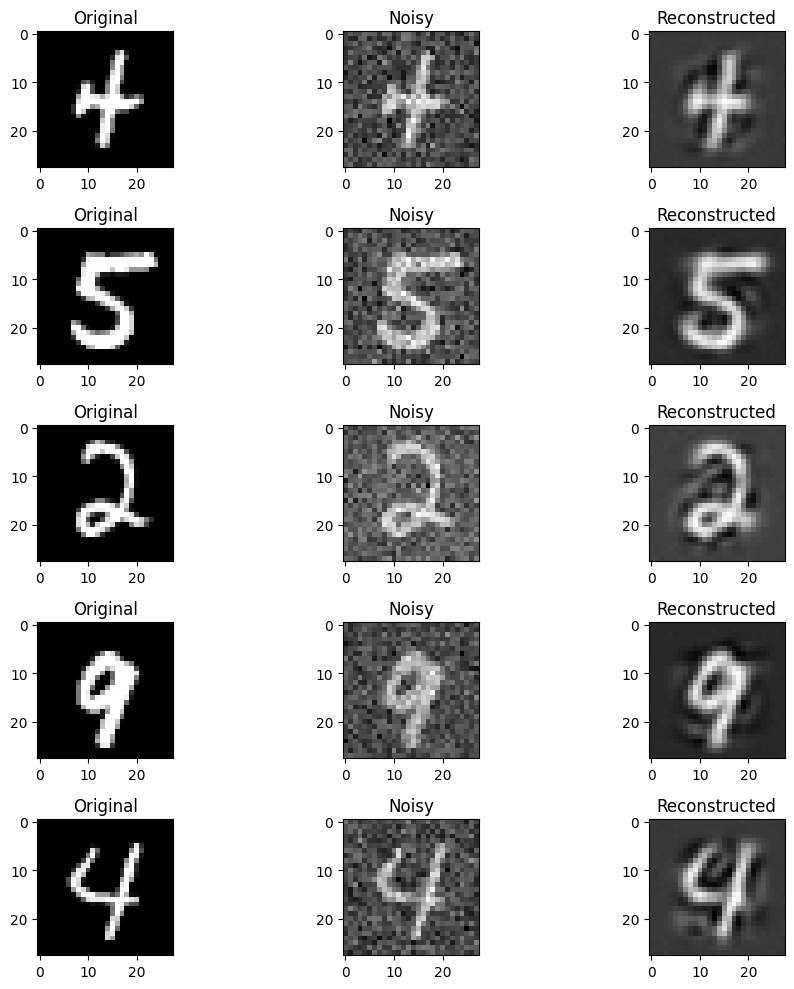

In [6]:
# Define the transformation to add Gaussian noise
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize the pixel values
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create dataloaders for training and testing
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
import numpy as np
from sklearn.decomposition import PCA

# Flatten into 1D arrays
train_images = train_dataset.data.reshape(-1, 784)
test_images = test_dataset.data.reshape(-1, 784)

# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add Gaussian noise to the images
mean = 0
stddev = 0.2
train_noisy_images = train_images + np.random.normal(mean, stddev, size=train_images.shape)
test_noisy_images = test_images + np.random.normal(mean, stddev, size=test_images.shape)

# Apply PCA to denoise the noisy images
n_components = 64  # Number of principal components to keep
pca = PCA(n_components=n_components)
train_denoised_images = pca.fit_transform(train_noisy_images)
test_denoised_images = pca.transform(test_noisy_images)

# Select a few random images for visualization
num_images = 5
random_indices = np.random.randint(0, len(test_dataset), size=num_images)

fig, axes = plt.subplots(num_images, 3, figsize=(10, 10))

for i, idx in enumerate(random_indices):
    # Original image
    original_img = test_dataset[idx][0]
    axes[i, 0].imshow(original_img.squeeze(), cmap='gray')
    axes[i, 0].set_title("Original")

    # Noisy image
    noisy_img = test_noisy_images[idx].reshape(28, 28)
    axes[i, 1].imshow(noisy_img, cmap='gray')
    axes[i, 1].set_title("Noisy")

    # Reconstructed image
    denoised_img = pca.inverse_transform(test_denoised_images[idx]).reshape(28, 28)
    axes[i, 2].imshow(denoised_img, cmap='gray')
    axes[i, 2].set_title("Reconstructed")

plt.tight_layout()
plt.show()